In [2]:
# import libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from scipy import stats
from pandas import DataFrame
from statsmodels.stats.anova import AnovaRM
from statsmodels.stats.api import anova_lm
from statsmodels.formula.api import ols

# Read Data

In [3]:
battles = pd.read_csv('./gameofthrones/battles.csv', index_col = 0, header = 0)
deaths = pd.read_csv('./gameofthrones/character_deaths.csv', index_col = 0, header = 0)
predictions = pd.read_csv('./gameofthrones/character_predictions.csv', index_col = 0, header = 0)

In [21]:
print("Battles columns:\n", battles.columns, "\n", "\n",
      "Deaths columns: \n",deaths.columns, "\n", "\n",
      "Predictions columns:\n", predictions.columns)

Battles columns:
 Index(['year', 'battle_number', 'attacker_king', 'defender_king', 'attacker_1',
       'attacker_2', 'attacker_3', 'attacker_4', 'defender_1', 'defender_2',
       'defender_3', 'defender_4', 'attacker_outcome', 'battle_type',
       'major_death', 'major_capture', 'attacker_size', 'defender_size',
       'attacker_commander', 'defender_commander', 'summer', 'location',
       'region', 'note'],
      dtype='object') 
 
 Deaths columns: 
 Index(['Allegiances', 'Death Year', 'Book of Death', 'Death Chapter',
       'Book Intro Chapter', 'Gender', 'Nobility', 'GoT', 'CoK', 'SoS', 'FfC',
       'DwD'],
      dtype='object') 
 
 Predictions columns:
 Index(['actual', 'pred', 'alive', 'plod', 'name', 'title', 'male', 'culture',
       'dateOfBirth', 'DateoFdeath', 'mother', 'father', 'heir', 'house',
       'spouse', 'book1', 'book2', 'book3', 'book4', 'book5', 'isAliveMother',
       'isAliveFather', 'isAliveHeir', 'isAliveSpouse', 'isMarried', 'isNoble',
       'age', 'n

In [39]:
battles

year  battle_number  \
name                                                                      
Battle of the Golden Tooth                           298              1   
Battle at the Mummer's Ford                          298              2   
Battle of Riverrun                                   298              3   
Battle of the Green Fork                             298              4   
Battle of the Whispering Wood                        298              5   
Battle of the Camps                                  298              6   
Sack of Darry                                        298              7   
Battle of Moat Cailin                                299              8   
Battle of Deepwood Motte                             299              9   
Battle of the Stony Shore                            299             10   
Battle of Torrhen's Square                           299             11   
Battle of Winterfell                                 299             12   
Sack of Torrhen's Square                             299             13   
Sack of Winterfell                                   299             14   
Battle of Oxcross                                    299             15   
Siege of Storm's End                                 299             16   
Battle of the Fords                                  299             17   
Sack of Harrenhal                                    299             18   
Battle of the Crag                                   299             19   
Battle of the Blackwater                             299             20   
Siege of Darry                                       299             21   
Battle of Duskendale                                 299             22   
Battle of the Burning Septry                         299             23   
Battle of the Ruby Ford                              299             24   
Retaking of Harrenhal                                299             25   
The Red Wedding                                      299             26   
Siege of Seagard                                     299             27   
Battle of Castle Black                               300             28   
Fall of Moat Cailin                                  300             29   
Sack of Saltpans                                     300             30   
Retaking of Deepwood Motte                           300             31   
Battle of the Shield Islands                         300             32   
Invasion of Ryamsport, Vinetown, and Starfish H...   300             33   
Second Seige of Storm's End                          300             34   
Siege of Dragonstone                                 300             35   
Siege of Riverrun                                    300             36   
Siege of Raventree                                   300             37   
Siege of Winterfell                                  300             38   

                                                               attacker_king  \
name                                                                           
Battle of the Golden Tooth                          Joffrey/Tommen Baratheon   
Battle at the Mummer's Ford                         Joffrey/Tommen Baratheon   
Battle of Riverrun                                  Joffrey/Tommen Baratheon   
Battle of the Green Fork                                          Robb Stark   
Battle of the Whispering Wood                                     Robb Stark   
Battle of the Camps                                               Robb Stark   
Sack of Darry                                       Joffrey/Tommen Baratheon   
Battle of Moat Cailin                                    Balon/Euron Greyjoy   
Battle of Deepwood Motte                                 Balon/Euron Greyjoy   
Battle of the Stony Shore                                Balon/Euron Greyjoy   
Battle of Torrhen's Square                                        Robb Stark   
Battle of W

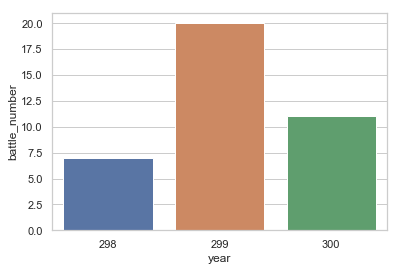

In [45]:
sns.set(style="whitegrid")
bat__per_year = battles.groupby("year").count().reset_index()
sns.barplot(x= "year",y='battle_number', data=bat__per_year)

In [31]:
death_in_battles_per_year= battles.groupby("year")["major_death"].mean()
death_in_battles_per_year

year
298    0.571429
299    0.400000
300    0.100000
Name: major_death, dtype: float64

In [50]:
deaths.dropna()
death_per_year = deaths.groupby('Death Year').count().reset_index()
death_per_year 

Death Year  Allegiances  Book of Death  Death Chapter  Book Intro Chapter  \
0       297.0            3              3              3                   3   
1       298.0           46             46             46                  46   
2       299.0          156            156            154                 154   
3       300.0          100            100             92                  97   

   Gender  Nobility  GoT  CoK  SoS  FfC  DwD  
0       3         3    3    3    3    3    3  
1      46        46   46   46   46   46   46  
2     156       156  156  156  156  156  156  
3     100       100  100  100  100  100  100

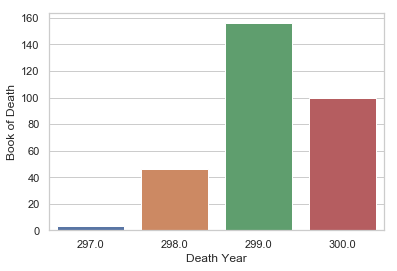

In [51]:
sns.set(style="whitegrid")
sns.barplot(x= 'Death Year',y='Book of Death', data=death_per_year)